# Assignment: Classification of Handwritten Digits

In this assignment, we will use the $k$-nearest neighbour classifier and a dense neural network (multilayer perceptron) to classify handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/).



In [1]:
course_5DV124 = True

In [2]:
import numpy as np
np.random.seed(42)  # Set the random seed for reproducible results

In [3]:
# Load the MNIST dataset (this may take a while)

import sklearn.datasets

data = sklearn.datasets.fetch_openml("mnist_784")

print(data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# Split the data into training, (validation), and test set

from sklearn.model_selection import train_test_split


Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, test_size=0.25, random_state=1)

# You may alternatively skip this / have a combined Xtrain and Xval here and instead use cross-validation below
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=1)
Xtrain =  np.asarray(Xtrain)
Xtest =  np.asarray(Xtest)
Xval =  np.asarray(Xval)
ytrain =  np.asarray(ytrain)
ytest =  np.asarray(ytest)
yval =  np.asarray(yval)


# Note! Do not touch the test data until the very end!

print(f"Training set size X   : {Xtrain.shape}")
print(f"Training set size y   : {ytrain.shape}")
print(f"Validation set size X : {Xval.shape}")
print(f"Validation set size y : {yval.shape}")
print(f"Test set size X       : {Xtest.shape}")
print(f"Test set size y       : {ytest.shape}")
print(f"Output classes        : {set(ytrain)}")

Training set size X   : (52500, 784)
Training set size y   : (52500,)
Validation set size X : (8750, 784)
Validation set size y : (8750,)
Test set size X       : (8750, 784)
Test set size y       : (8750,)
Output classes        : {'4', '9', '2', '7', '1', '3', '8', '6', '0', '5'}


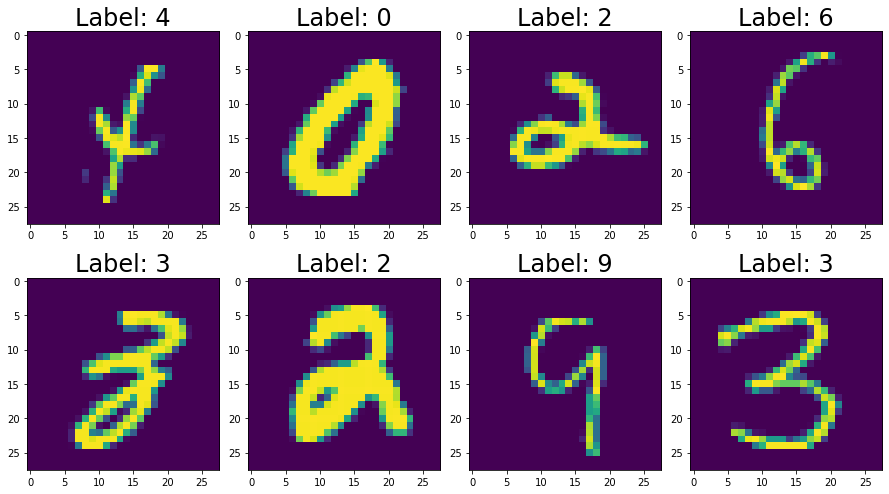

In [5]:
# Plot a few images

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7.75))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

plot_array = (2, 4)
ax = [[None] * plot_array[1]] * plot_array[0]
it = 0
for i in range(plot_array[0]):
    for j in range(plot_array[1]):
        ax[i][j] = plt.subplot2grid((2, 4), (i, j), rowspan=1, colspan=1)
        ax[i][j].imshow(Xtrain[it, :].reshape((28, 28)))
        ax[i][j].set_title(f"Label: {ytrain[it]}", fontsize=24)
        it += 1

In [6]:
# Preprocess the data

import sklearn.preprocessing

print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"Before preprocessing, validation data : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(Xtrain)  # Every statistic we compute is found on the training data!

Xtrain = scaler.transform(Xtrain)
Xval = scaler.transform(Xval)
# TODO: If you do cross-validation, you must redo this on the training data in
#       each cross-validation loop, and then transform the validation data as
#       well!
Xtest = scaler.transform(Xtest)

print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")
print(f"After preprocessing, validation data  : "
      f"min = {np.min(Xval):.1f}, "
      f"max = {np.max(Xval):.1f}, "
      f"mean = {np.mean(Xval):.1f}, "
      f"std = {np.std(Xval):.1f}")
print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

# TODO: Try to apply other preprocessing, e.g. the
#       sklearn.preprocessing.StandardScaler(), and see if the results improve.

Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 33.4, std = 78.7
Before preprocessing, validation data : min = 0.0, max = 255.0, mean = 33.2, std = 78.5
Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 33.3, std = 78.6
After preprocessing, test data        : min = -1.0, max = 1.0, mean = -0.7, std = 0.6
After preprocessing, validation data  : min = -1.0, max = 31.0, mean = -0.7, std = 0.6
After preprocessing, test data        : min = -1.0, max = 225.0, mean = -0.7, std = 0.6


In [7]:
# Create the k-NN classifier

import math
import sklearn.neighbors

import time


if course_5DV124:
    # TODO: Create your own nearest neighbour classifier:
    class KNeighborsClassifier(sklearn.neighbors.KNeighborsClassifier):

        def __init__(self, n_neighbors=5):
            """ Initialize a K nearest neighbor classifier, using n nearest neighbors."""
            self.n_neighbors = n_neighbors
            self.data = [] # Will store our training data
            #self.start_time = time.time()
            
        def fit(self, X, y):
            """
            Fits/adds the training data to the model
            
            Arguments:
            X -- a (n x p) data matrix containing n rows of observations/pictures
            y -- a (1 x n) vector containing the labels corresponding to X
            
            Returns: KNeighborsClassifier object with training data fitted to it
            """
            # Create a list of pixel values and labels [[pic1, l1], [pic2, l2]]
            for i, picture in enumerate(X):
                picture_and_label = (picture, y[i])       
                self.data.append(picture_and_label)
            
            # Set list to np array
            self.data = np.array(self.data, dtype='object')
            
            #print(f"Model fitted using k= {self.n_neighbors} neighbors after: {time.time()-self.start_time}s")
            return self
            

        def predict(self, X):
            """
            Predict the class/label of given observations X
            
            Arguments:
            X -- a (n x p) matrix containing n observations
            
            Returns: Model with updated accuracy/loss
            OR
            Returns: The predicted label of the observation
            """
            
            
            predictions = []
            for test_pic in X: # Loop over all pictures in X 
                
                distance_list = []
                label_list = []
                for train_pic in self.data: # Calculate the distance to each test_pic and store in a list
                    d = self.get_distance(test_pic, train_pic[0])
                    distance_list.append(d)
                    label_list.append(train_pic[1])

                #print(f"All the distances has been calculated after: {time.time()-self.start_time}s")
                np.asarray(distance_list)
                np.asarray(label_list)
                
                indexes = np.argpartition(distance_list, self.n_neighbors)[:self.n_neighbors]
                
                min_labels = np.take(label_list, indexes)
                
                count_list = [0 for i in range(10)] # list containing number of occurances of each label
                for label in min_labels:
                    count_list[int(label)] += 1 # add 1 to the index of correct label (label is str)
                
                max_value = max(count_list) # get the highest count index
                prediction = count_list.index(max_value) # index of the highest count = our prediction
                
                predictions.append(str(prediction)) # add prediction to list, need to be string for validation
            
            #print(f"all predictions done")
            return predictions
        
        
        def get_distance(self, obs_1, obs_2):
            """dist = 0
            for test, train in zip(test_observation, train_observation):
                dist += (test-train)**2
            
            actual_dist = math.sqrt(dist)"""
            sum_squared = np.sum(np.square(obs_1 - obs_2))
            distance = np.sqrt(sum_squared)
            
            return distance         
            
else:  # This is used if you take the course 5DV201
    import sklearn.neighbors.KNeighborsClassifier as KNeighborsClassifier
    
    

In [9]:
# Perform grid search to find the number of neighbours, K

import time

start_time = time.time()
k_max = 10  # Set the maximum number of neighbours considered

errs_val = []
# TODO: Perform a hyper-parameter search for the parameter k here. Either use
#       the validation dataset, or optionally use cross-validation here.
k = 1
while k <= k_max:
    model = KNeighborsClassifier(n_neighbors=k)
    # TODO: The distance computations may take a long time. Play with different
    #       amounts of data here to see what's feasible for you. Get it to work
    #       on a small amount of data, and then run for a longer time with more
    #       data. You may not be able to use all data with the k-NN method,
    #       depending on the computer you have for this.
    model.fit(Xtrain[:30000, :], ytrain[:30000])
    err = model.score(Xval[:6000, :], yval[:6000])
    print(f"Number of neighbours: k={k}, validation accuracy: {err}, accumulated time: {time.time()-start_time}")
    errs_val.append(err)
    k += 1

print("Grid search done!")

print(f"Accuracy list: k: 0-10: {errs_val}")

Number of neighbours: k=1, validation accuracy: 0.9638333333333333, accumulated time: 4095.2526738643646
Number of neighbours: k=2, validation accuracy: 0.9561666666666667, accumulated time: 8362.204476118088
Number of neighbours: k=3, validation accuracy: 0.9646666666666667, accumulated time: 12650.59237742424
Number of neighbours: k=4, validation accuracy: 0.9633333333333334, accumulated time: 17207.446527004242
Number of neighbours: k=5, validation accuracy: 0.9611666666666666, accumulated time: 21332.512281417847
Number of neighbours: k=6, validation accuracy: 0.9611666666666666, accumulated time: 25630.001408338547
Number of neighbours: k=7, validation accuracy: 0.9603333333333334, accumulated time: 29324.34487438202
Number of neighbours: k=8, validation accuracy: 0.9591666666666666, accumulated time: 32977.97143411636
Number of neighbours: k=9, validation accuracy: 0.9595, accumulated time: 36631.75472688675
Number of neighbours: k=10, validation accuracy: 0.9581666666666667, acc

Text(0, 0.5, 'Validation Accuracy')

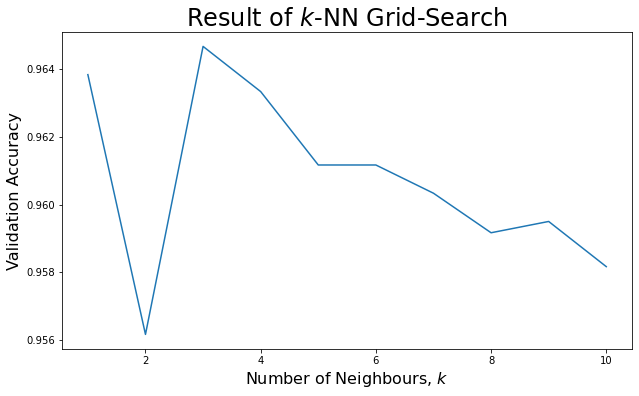

In [10]:
# Plot the accuracy curve as a function of k

fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

ax0 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax0.plot(range(1, len(errs_val) + 1), errs_val)
ax0.set_title("Result of $k$-NN Grid-Search", fontsize=24)
ax0.set_xlabel("Number of Neighbours, $k$", fontsize=16)
ax0.set_ylabel("Validation Accuracy", fontsize=16)

In [11]:
# Train the final k-NN model with the best value for k

k_best = np.argmax(errs_val) + 1  # Note that k=1 is at index 0.
print(f"The best value was {errs_val[k_best - 1]}, found using k={k_best}.")

model_knn = KNeighborsClassifier(n_neighbors=k_best)
model_knn.fit(Xtrain[:52500, :], ytrain[:52500])
err = model_knn.score(Xval[:8750, :], yval[:8750])
print(f"Final validation accuracy: {err}")

The best value was 0.9646666666666667, found using k=3.
Final validation accuracy: 0.9707428571428571


In [12]:
# Evaluate the final model on all the data sets, including the test data. We
# only evaluate the test data once, and as the last thing we do. If you train
# another model after this, based on the performance on the test data, then your
# test data is effectively a validation dataset, and you no longer have a test
# dataset. (Or, if you keep your test data set, then your results are biased and
# by that unreliable.)
print(f"k-NN model training data accuracy  : {model_knn.score(Xtrain[:8750, :], ytrain[:8750])}")
print(f"k-NN model validation data accuracy: {model_knn.score(Xval, yval)}")
if True:  # Change this to True as the very last thing you do!
    print(f"k-NN model test data accuracy      : "
          f"{model_knn.score(Xtest, ytest)}")


k-NN model training data accuracy  : 0.9845714285714285
k-NN model validation data accuracy: 0.9707428571428571
k-NN model test data accuracy      : 0.9716571428571429
